In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/shrinidhi/Desktop/sem8/Numerical Methods/Assignment/Assignment-3/case_time_series.csv')

In [3]:
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0


In [4]:
df.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
424,29 March 2021,2021-03-29,56152,12095284,36989,11390669,266,161556
425,30 March 2021,2021-03-30,53237,12148521,41242,11431911,355,161911
426,31 March 2021,2021-03-31,72113,12220634,40423,11472334,458,162369
427,1 April 2021,2021-04-01,81398,12302032,50384,11522718,468,162837
428,2 April 2021,2021-04-02,89019,12391051,44176,11566894,713,163550


In [5]:
df.shape[0]

429

In [6]:
day_no = []
for i in range(df.shape[0]):
    day_no.append(i)

In [7]:
daily_conf = df['Daily Confirmed'].to_list()

In [8]:
total_conf = df['Total Confirmed'].to_list()

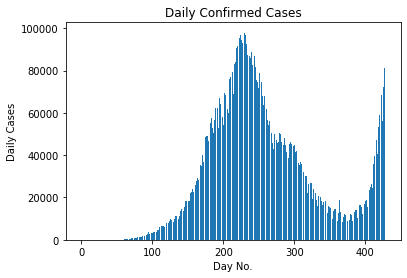

In [9]:
plt.bar(day_no, daily_conf)
# naming the x axis
plt.xlabel('Day No.')
# naming the y axis
plt.ylabel('Daily Cases')
# giving a title to my graph
plt.title('Daily Confirmed Cases')
plt.show()


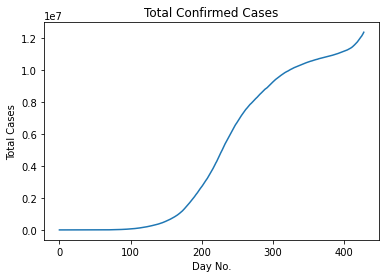

In [10]:
plt.plot(day_no, total_conf)
# naming the x axis
plt.xlabel('Day No.')
# naming the y axis
plt.ylabel('Total Cases')
# giving a title to my graph
plt.title('Total Confirmed Cases')
plt.show()

In [11]:
from math import log

def L(n, k):
    """
    Lagrange Coefficient Polynomial
    """
    num = 1
    den = 1
    for i in range(n):
        if i != k:
            num *= (x_pred - x[i])
            den *= (x[k] - x[i])
    return num/den

def lagrange_interpolation(x, y, x_pred):
    """
    Arguments
    ---------
    x: list
        x values
    y: list
        y value
    x_pred: float
        x value for which y value is being predicted
    """
    if len(x) != len(y):
        raise ValueError("x and y shape don't match")

    n = len(x)
    y_pred = 0
    for i in range(0, n):
        # print('Coeff at', i, ':', L(n,i))
        y_pred += y[i] * L(n, i)
    
    return y_pred

In [12]:
# Find interpolated value for

x = day_no
y = daily_conf
error = 0

for x_pred in x:
    y_pred = lagrange_interpolation(x, y, x_pred)
    error += (y_pred - daily_conf[x_pred]) ** 2
    # print('Interpolated value', y_pred)
    # print('Actual value', daily_conf[50])

print(f'Error: {error}')

Error: 0.0


## Application 1: Chemistry

(i) Water vapour splits into Oxygen and Hydrogen at
higher temperature as 

> $2H$<sub>$2$</sub>$O$ $->$ $2H$<sub>$2$</sub> + $O$<sub>$2$</sub>

The model for the _reaction rate_ `r` and _mole fraction_ `f` of
$H$<sub>$2$</sub>$O$ is given by

> $r$ $=$ $R$<sub>$2$</sub>/$R$<sub>$1$</sub> 

,with concentrations $R$<sub>$1$</sub> = \[$H$<sub>$2$</sub>$O$\]<sup>$2$</sup>
, $R$<sub>$2$</sub> = \[$H$<sub>$2$</sub>\]<sup>$2$</sup>\[$O$<sub>$2$</sub>\] and

> $k$ = $f/(1-f)$ $\sqrt{2p/(2+f)}$

where $k$ $=$ $0.04$ is a given reaction equilibrium constant
and $p$ $=$ $3.5atm$ is the total pressure at some temperature $T$.

> $F$ $=$ $F(f)$ $=$ $0.04$ $-$ $f/(1-f)$ $\sqrt{7/(2+f)}$ $=$ $0$

The Newton’s method for $F$ is
> $f$<sub>$i+1$</sub> $=$ $f$<sub>$i$</sub> $-$ $F$($f$<sub>$i$</sub>)/$F$’($f$<sub>$i$</sub>) , $i=0,1,2…$



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration-1, f1 = 0.0261640 and F(f1) = -0.0099378
Iteration-2, f1 = 0.0210614 and F(f1) = -0.0000397
Iteration-3, f1 = 0.0210408 and F(f1) = -0.0000000

Required root is: 0.02104084


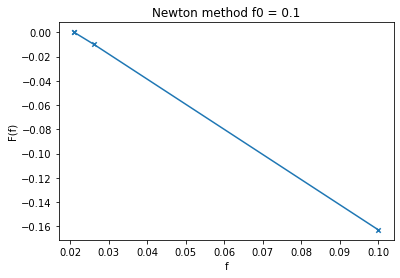

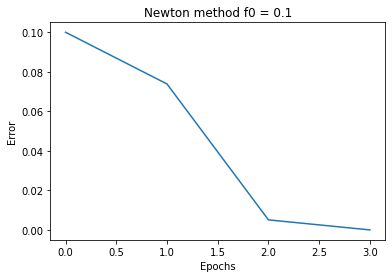

In [37]:
import math
import numpy
import matplotlib.pyplot as plt

def F(f):
    return (0.04 - (f/(1-f))*(math.sqrt(7/(2+f))))

def dF(f):
    return -1 * ((1.32288 * (f ** 2) + 1.32288 * f + 5.2915)/(((f-1) ** 2) * ((f+2) ** 1.5)))

def newtonRaphson(x0, e, N):
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if dF(x0) == 0.0:
            print('Divide by zero error!')
            break

        prev_x0 = x0
        x1 = x0 - F(x0)/dF(x0)
        print('Iteration-%d, f1 = %0.7f and F(f1) = %0.7f' % (step, x1, F(x1)))
        epochs.append(step)
        x1_val.append(x1)
        fx_val.append(F(x1))

        x0 = x1
        step = step + 1

        if step > N:
            flag = 0
            break

        # uncomment this if you want function value to be within error
        # condition = abs(f(x1)) > e

        error_val.append(abs(x1 - prev_x0))

        # here, root value is considered for error
        condition = abs(x1 - prev_x0) > e and F(x1) != 0 and abs(F(x1)) > e

    if flag == 1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


# Initial guess
x0 = 0.1
# Error
e = 1e-6
# Max iterations
N = 10

epochs = []
x1_val = []
fx_val = []
error_val = []

x1_val.append(x0)
fx_val.append(F(x0))
error_val.append(x0)
epochs.append(0)

# Starting Newton Raphson Method
newtonRaphson(x0, e, N)

plt.scatter(x1_val, fx_val, s=20, marker='x')
plt.plot(x1_val, fx_val)

# naming the x axis
plt.xlabel('f')
# naming the y axis
plt.ylabel('F(f)')
# giving a title to my graph
plt.title(f'Newton method f0 = {x0}')

plt.figure()
plt.plot(epochs, error_val)
plt.title(f'Newton method f0 = {x0}')
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.show()

(ii) The model below can be used to estimate _Oxygen level_ `c` $(mg/l)$ in a river downstream from a sewage discharge

> $C$ $=$ $10$ - $20$ x $(e$<sup>$-0.15x$</sup> $-$ $e$<sup>$-0.5x$</sup>$)$

The derivate of the above equation is:

> $C'$ $=$ $3e$<sup>$-0.15x$</sup> $-$ $10e$<sup>$-0.5x$</sup>

The Newton’s method for $C$ is
> $c$<sub>$i+1$</sub> $=$ $c$<sub>$i$</sub> $-$ $C'$($c$<sub>$i$</sub>)/$C"$(c<sub>$i$</sub>) , $i=0,1,2…$


## Application 2: Digital Image Processing

Edge detection using first derivative

> $Forward$ $difference$ $=$ $\Delta$<sub>+</sub> $=$ $f(x + h) - f(x)$

Consider an image I.
Let $\delta$I/$\delta$x be the gradient along x-direction (`dx`) and $\delta$I/$\delta$y be the gradient along y-direction (`dy`).

> $Magnitude$ $of$ $gradient$, $G$ $=$ $\sqrt{(dx^2 + dy^2)}$

In [27]:
from PIL import Image
import numpy as np
import math

img = Image.open('./cameraman.tif')

w, h = img.size

H = 1

I = np.empty(shape=(w, h))
I.fill(0)

dx = np.empty(shape=(w, h))
dx.fill(0)

dy = np.empty(shape=(w, h))
dy.fill(0)

edge = np.empty(shape=(w, h))
edge.fill(0)

for i in range(w):
    for j in range(h):
        I[i, j] = img.getpixel((j, i))

original_img = Image.fromarray(I)
original_img.show()

for i in range(w-1):
    for j in range(h-1):
        dx[i, j] = I[i, j+H] - I[i, j]

grad_x = Image.fromarray(dx)
grad_x.show()

for i in range(w-1):
    for j in range(h-1):
        dy[i, j] = I[i+H, j] - I[i, j]

grad_y = Image.fromarray(dy)
grad_y.show()

for i in range(w-1):
    for j in range(h-1):
        edge[i, j] = math.sqrt((dx[i, j]) ** 2 + (dy[i, j]) ** 2)

detected_edges = Image.fromarray(edge)
detected_edges.show()

new_grad_x = grad_x.convert("L")
new_grad_y = grad_y.convert("L")
new_detected_edges = detected_edges.convert("L")

new_grad_x.save('forward-diff-x.png')
new_grad_y.save('forward-diff-y.png')
new_detected_edges.save('detected-edges.png')

## Application 3: Machine Learning

Regression (using Principles of Least Squares)

* Linear: 
> $y$ $=$ $b$<sub>$0$</sub> $+$ $b$<sub>$1$</sub>$x$

* Non-linear
> $y$ $=$ $b$<sub>$0$</sub> $+$ $b$<sub>$1$</sub>$x$ $+$ $b$<sub>$2$</sub>$x^2$

Data to be fit:

![](./regression.png)